# TWA800 FLIGHT DATA RECORDER : DATA ANALYSIS

On July 17, 1996 at approximately 8:31PM EDT, TWA 800, a Boeing 747 en route to Paris with 230 passengers on board, suffered a catastrophic explosion at 13,800 feet. The aircraft broke up midflight and crashed into the Atlantic Ocean off the coast of Long Island, NY. The official cause was deemed an explosion in the central wing fuel tank likely sparked by a short in the electrical system. Read more at : http://www.stat.ucla.edu/~rosario/datasets/twa800/tw800case.html

The dataset above contain the recorded data from the flight data recorder, or "black boxes" (there are two, we only consider one of them here), averaged by second. The FDR records a ton of information about the aircraft's operation during its flights, with at least one entry per second (sometimes more than one). Some of the more mundane information measured includes altitude and airspeed. The data presented as Exhibit 10A is a very small subset of the complete data recorded by the FDR. This dataset is adapted from Exhibit 10A from the NTSB Accident Investigation.

The task here is to make relevant predictions of the Pressure parameter as a function of relevant features.

Begin by importing the libraries

In [1]:
#Import the libraries
library(ggplot2)
library(caTools)

Read the dataset and view it

In [2]:
#Import the dataset
twa800fdr <- read.csv("twa800fdr.csv")
dim(twa800fdr)
head(twa800fdr)

[1] 753  17

Second,Altitude,Airspeed,PitchAngle,ElevPosition,Heading,RollAngle,RudderPos,AngleAttack,Engine1,Engine2,Engine3,Engine4,LongAccel,VertAccel,PitchTrimStabPos,PressureAlt
1,22,83,-0.7,0,222.0,-1,4.0500,-25,1.02,1.01,1.01,1.01,0.0000,0.9700,6,14.75586
2,22,83,-0.7,0,223.0,-1,3.8475,-25,1.02,1.01,1.01,1.01,0.0020,0.9660,6,14.75586
3,22,83,-0.7,0,224.0,-1,2.6550,-25,1.02,1.01,1.01,1.01,0.0025,0.9625,6,14.75586
4,22,83,-0.7,0,224.0,-1,1.3275,-23,1.02,1.01,1.01,1.01,0.0040,0.9620,6,14.75586
5,22,83,-0.7,0,225.0,-1,0.0900,-25,1.02,1.01,1.01,1.01,0.0050,0.9625,6,14.75586
6,22,83,-0.7,0,224.5,-1,-1.3275,-25,1.02,1.01,1.01,1.01,0.0020,0.9620,6,14.75586


Check for NA's

In [3]:
#checking for NA"s
sum(is.na(twa800fdr))

[1] 16

Observed that there are 16 NA's in the last row of the dataset, corresponding to the 753rd second of flight. We treat the values of NA's as equal to that at the previous second. Assumed that some abnormality might have occured at the 753rd second.

In [4]:
#treating last row data at 753 seconds equal to the one at 752, some abnormality related to the crash 
twa800fdr[753,c(2:17)] <- twa800fdr[752,c(2:17)]
sum(is.na(twa800fdr))

[1] 0

## Data Visualization

Lets visualize the output variable PressureAlt against all the other features

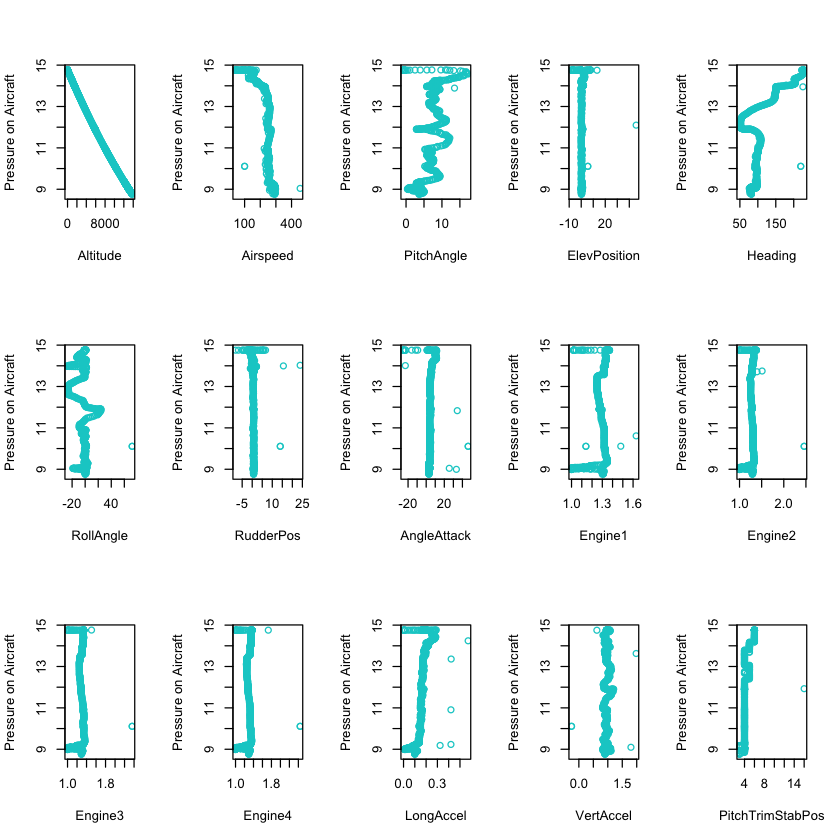

In [5]:
#Visualization
par(mfrow = c(3,5))
for(i in (2:16)){
    plot(x = twa800fdr[,i], y = twa800fdr[,17], xlab = colnames(twa800fdr)[i], ylab = "Pressure on Aircraft",col ='cyan3')
}

Observe the steady & vertical variations of the Pressure against others.

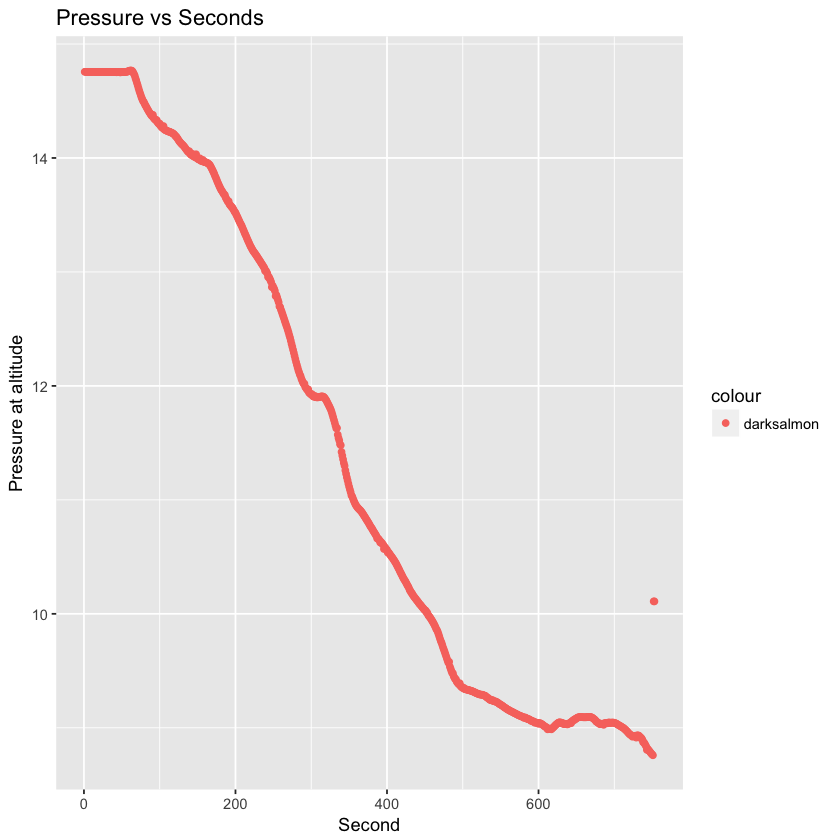

In [6]:
ggplot() +
  geom_point(aes(x = twa800fdr[,1], y = twa800fdr[,17], color = 'darksalmon'))+
  ggtitle('Pressure vs Seconds')+
  xlab(colnames(twa800fdr)[1])+
  ylab("Pressure at altitude")

As is the case with an aircraft, the pressure is high initially, which tapers off as the take-off happens. Also, there are some kinks in pressure from 600th second onwards, ending up at an increased value at the 753rd data point.

## Splitting data into training and test sets

In [7]:
set.seed(123)
split <- sample.split(twa800fdr[,17], SplitRatio = 0.75)
training_set <- subset(twa800fdr, split == TRUE)
test_set <- subset(twa800fdr, split == FALSE)

## Build Regression Models

In [8]:
# Fitting Multiple Linear Regression to the Training set
Linear_regressor <- lm(formula = PressureAlt ~.-Second,
                data = training_set)

In [9]:
#print summary statistics
summary(Linear_regressor)


Call:
lm(formula = PressureAlt ~ . - Second, data = training_set)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109374 -0.026728 -0.000241  0.025055  0.160954 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       1.421e+01  6.326e-02  224.549  < 2e-16 ***
Altitude         -4.189e-04  8.279e-07 -505.970  < 2e-16 ***
Airspeed          3.506e-04  1.011e-04    3.469 0.000564 ***
PitchAngle       -5.681e-03  7.656e-04   -7.420 4.48e-13 ***
ElevPosition      2.702e-03  7.306e-04    3.698 0.000239 ***
Heading           2.108e-03  8.281e-05   25.462  < 2e-16 ***
RollAngle        -6.895e-04  2.083e-04   -3.310 0.000996 ***
RudderPos        -6.221e-04  1.197e-03   -0.520 0.603470    
AngleAttack       6.358e-04  5.389e-04    1.180 0.238620    
Engine1           3.175e-01  5.096e-02    6.229 9.33e-10 ***
Engine2           8.760e-01  1.325e-01    6.611 9.08e-11 ***
Engine3          -2.384e+00  1.722e-01  -13.842  < 2e-16 ***
Engine4    

Lets eliminate the variables RudderPos, AngleAttack & LongAccel being insignificant

In [10]:
#Removing insignificant variables
Linear_regressor <- lm(formula = PressureAlt ~.-Second-RudderPos-AngleAttack-LongAccel,
                data = training_set)

In [11]:
#print summary statistics
summary(Linear_regressor)


Call:
lm(formula = PressureAlt ~ . - Second - RudderPos - AngleAttack - 
    LongAccel, data = training_set)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.114587 -0.026513 -0.000509  0.025443  0.161251 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       1.420e+01  5.612e-02  253.030  < 2e-16 ***
Altitude         -4.186e-04  7.687e-07 -544.503  < 2e-16 ***
Airspeed          3.731e-04  9.713e-05    3.841 0.000137 ***
PitchAngle       -5.674e-03  6.998e-04   -8.109 3.33e-15 ***
ElevPosition      2.635e-03  7.261e-04    3.629 0.000311 ***
Heading           2.113e-03  8.180e-05   25.835  < 2e-16 ***
RollAngle        -6.505e-04  2.043e-04   -3.184 0.001534 ** 
Engine1           3.032e-01  4.254e-02    7.128 3.22e-12 ***
Engine2           9.124e-01  1.263e-01    7.221 1.72e-12 ***
Engine3          -2.439e+00  1.635e-01  -14.922  < 2e-16 ***
Engine4           1.109e+00  1.273e-01    8.719  < 2e-16 ***
VertAccel        -5.131e-02  

In [12]:
# Predicting the Test set results
y_pred <- predict(Linear_regressor, newdata = test_set)
Linear_mse <- mean((test_set$PressureAlt - y_pred)^2)
Linear_mse
dim(test_set)

[1] 0.004800659

[1] 189  17

We observe that the MSE is lower, R-squared statistics are also good.

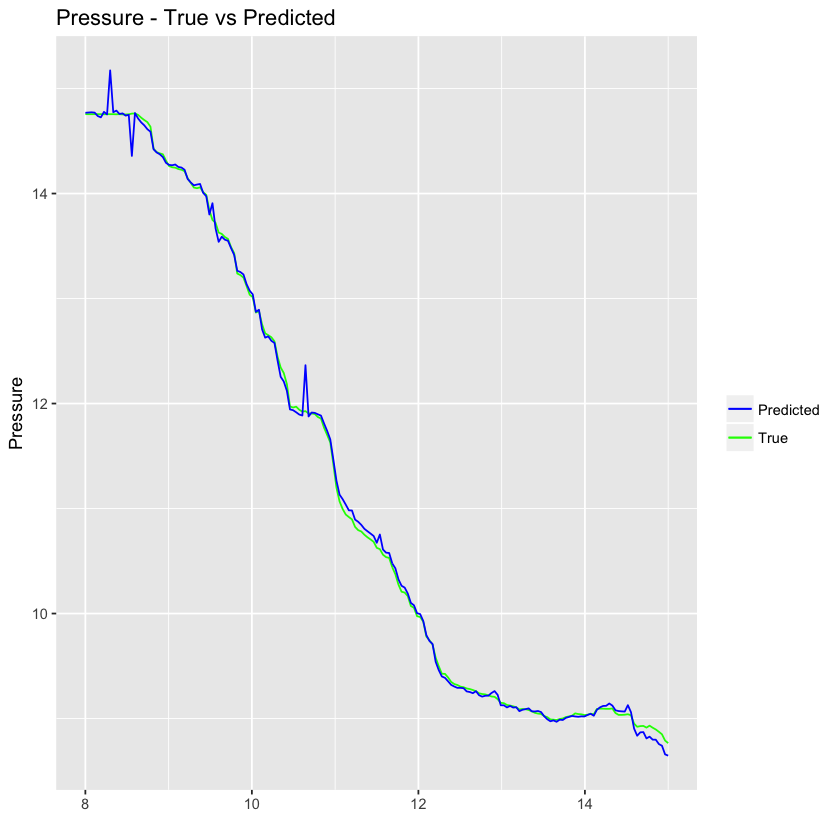

In [13]:
ggplot() +
  geom_line(aes(x = seq(8,15,length.out = 189), y = test_set$PressureAlt, color = 'True')) +
  geom_line(aes(x = seq(8,15,length.out = 189), y = y_pred, color = 'Predicted'))+
  scale_color_manual(name=' ',values=c(True ='green', Predicted ='blue'))+
  ggtitle('Pressure - True vs Predicted') +
  xlab(' ') +
  ylab('Pressure')

The predictions of the PressureAlt variable seems to be following the true values like in a Tom-and-Jerry game.

## Concluding Remarks

1. The Linear Regression model could get accurate predictions giving off very low MSE. This supports the observations  from the scatter plots.
2. The variables RudderPos, AngleAttack and LongAccel are not relevant predictors of Pressure on Aircraft.
3. As is the case with an aircraft, the pressure is high initially, which tapers off as the take-off happens.But, there are some kinks in pressure (quick up and down variations) from 600th second onwards as observed from the scatter plots. This could be related to the catastrophic break down of the aircraft.